In [1]:
import math
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Crea un gráfico circular con el porcentaje de fotógrafos prefesionales y los que no
def show_loan_distrib(y):
    i=0
    normales = 0
    fotografos = 0
    while (i<len(y)):
        if y[i]==0:
            normales+=1
        else: fotografos+=1
        i+=1

    tamanos = [fotografos, normales]

    etiquetas = [f'Fotógrafos profesionales - {tamanos[0]}', f'Otros usuarios - {tamanos[1]}']


    plt.pie(tamanos, labels=etiquetas, autopct = '%1.1f%%', explode = [0, 0.1])

    plt.show()

Para obtener el dataset con los datos para la replicación de los experimentos, consultar el README del repositorio.

In [ ]:
DATASET_FLICKR = 
DATASET_IG = 

Cargamos los datos de Flickr

In [3]:
# Cargamos los datos
dt_flickr = pd.read_csv(DATASET_FLICKR)

Eliminamos a los usuarios "DELETED"

In [4]:
# Cambiamos la columna a bool
dt_flickr['is_photographer'] = dt_flickr['is_photographer'].map({'Yes':True,'No':False}).fillna('DELETED')

# Contamos el número de usuarios DELETED
num_deleted = dt_flickr['is_photographer'].value_counts().get('DELETED', 0)
print(num_deleted)
# Quitamos las filas de los usuarios borrados
dt_flickr = dt_flickr[dt_flickr['is_photographer'] != 'DELETED']

num_deleted = dt_flickr['is_photographer'].value_counts().get('DELETED', 0)
print(num_deleted)

# Contamos el número de usuarios para cada etiqueta
num_yes = dt_flickr.loc[dt_flickr['is_photographer'] == True, 'is_photographer'].count()
num_no = dt_flickr.loc[dt_flickr['is_photographer'] == False, 'is_photographer'].count()

print(num_yes)
print(num_no)
print(num_deleted+num_no+num_yes)

3
0
52
153
205


Reseteamos los índices

In [5]:
dt_flickr = dt_flickr.reset_index(drop=True)
dt_flickr

,following_n,groups_n,ispro,join_date,nsid,occupation_bool,photo_count,professional,website_bool,avg_diff_words_max,...,tags_n_mean,tags_n_median,tags_n_min,tags_n_std,views_max,views_mean,views_median,views_min,views_std,is_photographer
0,65,1,True,1375997266,100017484@N04,True,700,False,True,0.500000,...,2.930000,3.0,0.0,2.055505,2398.0,591.820000,429.0,197.0,428.790680,False
1,385,258,True,1376180991,100102158@N04,False,1483,False,False,2.333333,...,2.030000,1.0,0.0,2.886018,64111.0,3868.390000,2597.0,768.0,6537.878027,True
2,45,368,True,1376178980,100108154@N02,False,10529,False,True,0.105477,...,15.212121,16.0,0.0,5.680505,4466.0,285.444444,144.0,35.0,478.711111,False
3,1373,2174,True,1376447009,100251406@N07,True,16756,False,True,0.004918,...,10.860000,10.0,1.0,3.747052,2469.0,564.190000,465.5,259.0,298.441843,False
4,1,0,True,1376452201,100254002@N07,False,16806,False,False,0.000000,...,4.090909,0.0,0.0,9.279162,196.0,43.040404,32.0,4.0,38.516406,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,True,1395688075,121299475@N07,False,16770,False,False,0.000000,...,0.030303,0.0,0.0,0.171420,622.0,27.686869,12.0,2.0,84.184579,False
201,16,11,False,1395750145,121373402@N04,False,276,False,False,0.000121,...,7.570000,0.0,0.0,10.813191,581.0,81.960000,41.0,14.0,99.140801,False
202,197,30,True,1395863936,121503813@N04,False,3114,False,True,0.000020,...,0.015152,0.0,0.0,0.158186,919.0,45.368687,14.5,0.0,83.283563,False
203,68,34,True,1169692615,12174030@N00,False,15420,False,True,0.000141,...,3.250000,2.0,0.0,3.675255,3681.0,547.010000,353.0,68.0,567.844600,False


Guardamos las etiquetas de Flickr manual y computacional

In [6]:
etiq_flickr_manual = dt_flickr['is_photographer']
etiq_flickr_auto = dt_flickr['professional']

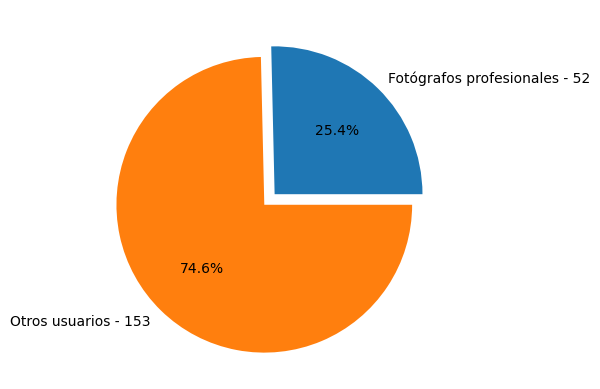

In [7]:
show_loan_distrib(etiq_flickr_manual)

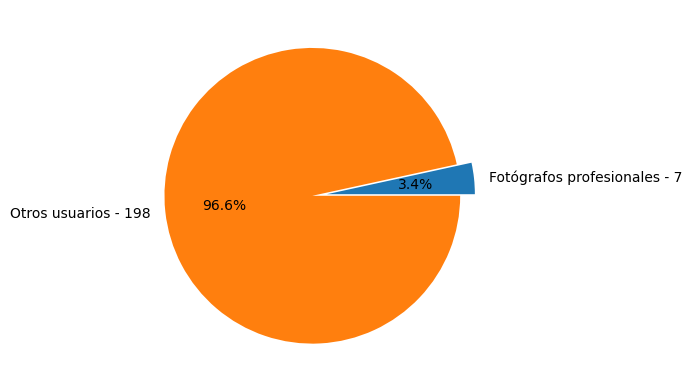

In [8]:
show_loan_distrib(etiq_flickr_auto)

Cargamos los datos de Instagram

In [9]:
dt_instagram = pd.read_csv(DATASET_IG)

Limpiamos los datos de Instagram para que no tengan usuarios DELETED.

In [10]:
# Cambiamos la columna a bool
dt_instagram['Photographer'] = dt_instagram['Photographer'].map({'Yes':True,'No':False}).fillna('DELETED')

# Contamos el número de usuarios DELETED
num_deleted = dt_instagram['Photographer'].value_counts().get('DELETED', 0)
print(num_deleted)
# Quitamos las filas de los usuarios borrados
dt_instagram = dt_instagram[dt_instagram['Photographer'] != 'DELETED']

num_deleted = dt_instagram['Photographer'].value_counts().get('DELETED', 0)
print(num_deleted)

# Contamos el número de usuarios para cada etiqueta
num_yes = dt_instagram.loc[dt_instagram['Photographer'] == True, 'Photographer'].count()
num_no = dt_instagram.loc[dt_instagram['Photographer'] == False, 'Photographer'].count()

print(num_yes)
print(num_no)
print(num_deleted+num_no+num_yes)

26
0
89
93
182


Creamos el conjunto de datos que tenga etiqueta computacional

In [11]:
dt_ig_etiq = pd.read_csv('datasetPhotographerClassification.csv')
dt_ig_etiq = dt_ig_etiq.loc[dt_instagram.index]
dt_ig_etiq = dt_ig_etiq.reset_index(drop=True)
dt_ig_etiq['Photographer'] = dt_ig_etiq['Photographer'].map({True:1,False:0})
dt_ig_etiq

,followers,followees,numberOfPosts,imagePorcentage,sidecarPorcentage,videoPorcentage,isBusiness,isProfessional,hasLink,hideLikes,...,cEntropy,captionLength,captionSubjectivity,captionPolarity,captionDifficultWords,captionSecondsToRead,captionEntropy,captionAvgHashtags,captionVarHashtags,Photographer
0,4604,281,355,62.50,12.50,25.00,False,True,True,False,...,3.164,244.462,0,0,14.192,10.402,4.258,17.346,130.303,1
1,922,1573,193,3.23,96.77,0.00,True,True,True,False,...,3.793,585.500,1,1,28.133,24.653,4.605,28.233,17.046,1
2,598,630,650,100.00,0.00,0.00,False,False,False,True,...,4.239,667.133,0,0,33.333,28.431,4.672,29.833,0.339,0
3,276,302,170,70.97,25.81,3.23,False,True,False,False,...,3.577,394.733,0,0,14.533,16.908,4.591,24.800,29.893,0
4,821,502,1148,46.67,53.33,0.00,False,False,False,False,...,4.030,339.667,0,0,18.533,14.520,4.346,25.500,43.050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,139,203,54,18.92,62.16,18.92,False,True,True,False,...,3.702,142.000,0,0,7.900,5.836,4.313,5.667,42.622,1
178,1180,773,840,46.67,53.33,0.00,True,True,False,True,...,3.803,327.667,0,0,18.100,13.697,4.557,22.800,1.293,1
179,191,94,590,46.67,53.33,0.00,False,False,True,False,...,4.309,552.567,0,0,18.100,21.717,4.926,18.600,9.707,0
180,3060,999,291,87.88,3.03,9.09,False,True,False,False,...,4.077,773.333,1,1,33.000,31.768,4.429,27.333,10.489,1


Aunque sólo nos interesa la etiqueta

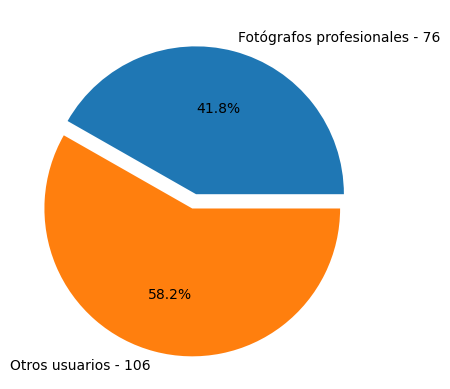

In [13]:
etiq_ig_aut = dt_ig_etiq['Photographer']
show_loan_distrib(etiq_ig_aut.astype(float))

Reseteamos los índices del conjunto de Instagram

In [14]:
dt_instagram = dt_instagram.reset_index(drop=True)
dt_instagram

,followers,followees,numberOfPosts,imagePorcentage,sidecarPorcentage,videoPorcentage,isBusiness,isProfessional,hasLink,hideLikes,...,cEntropy,captionLength,captionSubjectivity,captionPolarity,captionDifficultWords,captionSecondsToRead,captionEntropy,captionAvgHashtags,captionVarHashtags,Photographer
0,4604,281,355,62.50,12.50,25.00,False,True,True,False,...,3.164,244.462,0,0,14.192,10.402,4.258,17.346,130.303,False
1,922,1573,193,3.23,96.77,0.00,True,True,True,False,...,3.793,585.500,1,1,28.133,24.653,4.605,28.233,17.046,False
2,598,630,650,100.00,0.00,0.00,False,False,False,True,...,4.239,667.133,0,0,33.333,28.431,4.672,29.833,0.339,True
3,276,302,170,70.97,25.81,3.23,False,True,False,False,...,3.577,394.733,0,0,14.533,16.908,4.591,24.800,29.893,False
4,821,502,1148,46.67,53.33,0.00,False,False,False,False,...,4.030,339.667,0,0,18.533,14.520,4.346,25.500,43.050,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,139,203,54,18.92,62.16,18.92,False,True,True,False,...,3.702,142.000,0,0,7.900,5.836,4.313,5.667,42.622,False
178,1180,773,840,46.67,53.33,0.00,True,True,False,True,...,3.803,327.667,0,0,18.100,13.697,4.557,22.800,1.293,True
179,191,94,590,46.67,53.33,0.00,False,False,True,False,...,4.309,552.567,0,0,18.100,21.717,4.926,18.600,9.707,False
180,3060,999,291,87.88,3.03,9.09,False,True,False,False,...,4.077,773.333,1,1,33.000,31.768,4.429,27.333,10.489,False


Y guardamos la etiqueta manual

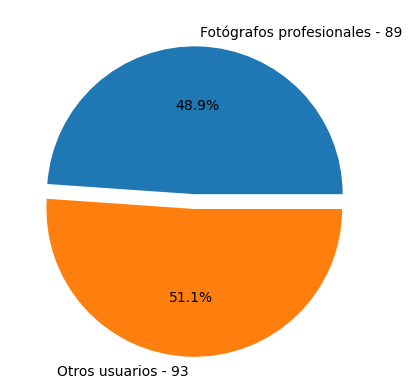

In [15]:
etiq_ig_manual = dt_instagram['Photographer']
show_loan_distrib(etiq_ig_manual.astype(float))

In [16]:
dt_flickr

,following_n,groups_n,ispro,join_date,nsid,occupation_bool,photo_count,professional,website_bool,avg_diff_words_max,...,tags_n_mean,tags_n_median,tags_n_min,tags_n_std,views_max,views_mean,views_median,views_min,views_std,is_photographer
0,65,1,True,1375997266,100017484@N04,True,700,False,True,0.500000,...,2.930000,3.0,0.0,2.055505,2398.0,591.820000,429.0,197.0,428.790680,False
1,385,258,True,1376180991,100102158@N04,False,1483,False,False,2.333333,...,2.030000,1.0,0.0,2.886018,64111.0,3868.390000,2597.0,768.0,6537.878027,True
2,45,368,True,1376178980,100108154@N02,False,10529,False,True,0.105477,...,15.212121,16.0,0.0,5.680505,4466.0,285.444444,144.0,35.0,478.711111,False
3,1373,2174,True,1376447009,100251406@N07,True,16756,False,True,0.004918,...,10.860000,10.0,1.0,3.747052,2469.0,564.190000,465.5,259.0,298.441843,False
4,1,0,True,1376452201,100254002@N07,False,16806,False,False,0.000000,...,4.090909,0.0,0.0,9.279162,196.0,43.040404,32.0,4.0,38.516406,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,True,1395688075,121299475@N07,False,16770,False,False,0.000000,...,0.030303,0.0,0.0,0.171420,622.0,27.686869,12.0,2.0,84.184579,False
201,16,11,False,1395750145,121373402@N04,False,276,False,False,0.000121,...,7.570000,0.0,0.0,10.813191,581.0,81.960000,41.0,14.0,99.140801,False
202,197,30,True,1395863936,121503813@N04,False,3114,False,True,0.000020,...,0.015152,0.0,0.0,0.158186,919.0,45.368687,14.5,0.0,83.283563,False
203,68,34,True,1169692615,12174030@N00,False,15420,False,True,0.000141,...,3.250000,2.0,0.0,3.675255,3681.0,547.010000,353.0,68.0,567.844600,False


# Dimensiones comunes

In [17]:
dt_flickr

,following_n,groups_n,ispro,join_date,nsid,occupation_bool,photo_count,professional,website_bool,avg_diff_words_max,...,tags_n_mean,tags_n_median,tags_n_min,tags_n_std,views_max,views_mean,views_median,views_min,views_std,is_photographer
0,65,1,True,1375997266,100017484@N04,True,700,False,True,0.500000,...,2.930000,3.0,0.0,2.055505,2398.0,591.820000,429.0,197.0,428.790680,False
1,385,258,True,1376180991,100102158@N04,False,1483,False,False,2.333333,...,2.030000,1.0,0.0,2.886018,64111.0,3868.390000,2597.0,768.0,6537.878027,True
2,45,368,True,1376178980,100108154@N02,False,10529,False,True,0.105477,...,15.212121,16.0,0.0,5.680505,4466.0,285.444444,144.0,35.0,478.711111,False
3,1373,2174,True,1376447009,100251406@N07,True,16756,False,True,0.004918,...,10.860000,10.0,1.0,3.747052,2469.0,564.190000,465.5,259.0,298.441843,False
4,1,0,True,1376452201,100254002@N07,False,16806,False,False,0.000000,...,4.090909,0.0,0.0,9.279162,196.0,43.040404,32.0,4.0,38.516406,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,True,1395688075,121299475@N07,False,16770,False,False,0.000000,...,0.030303,0.0,0.0,0.171420,622.0,27.686869,12.0,2.0,84.184579,False
201,16,11,False,1395750145,121373402@N04,False,276,False,False,0.000121,...,7.570000,0.0,0.0,10.813191,581.0,81.960000,41.0,14.0,99.140801,False
202,197,30,True,1395863936,121503813@N04,False,3114,False,True,0.000020,...,0.015152,0.0,0.0,0.158186,919.0,45.368687,14.5,0.0,83.283563,False
203,68,34,True,1169692615,12174030@N00,False,15420,False,True,0.000141,...,3.250000,2.0,0.0,3.675255,3681.0,547.010000,353.0,68.0,567.844600,False


In [18]:
dt_instagram

,followers,followees,numberOfPosts,imagePorcentage,sidecarPorcentage,videoPorcentage,isBusiness,isProfessional,hasLink,hideLikes,...,cEntropy,captionLength,captionSubjectivity,captionPolarity,captionDifficultWords,captionSecondsToRead,captionEntropy,captionAvgHashtags,captionVarHashtags,Photographer
0,4604,281,355,62.50,12.50,25.00,False,True,True,False,...,3.164,244.462,0,0,14.192,10.402,4.258,17.346,130.303,False
1,922,1573,193,3.23,96.77,0.00,True,True,True,False,...,3.793,585.500,1,1,28.133,24.653,4.605,28.233,17.046,False
2,598,630,650,100.00,0.00,0.00,False,False,False,True,...,4.239,667.133,0,0,33.333,28.431,4.672,29.833,0.339,True
3,276,302,170,70.97,25.81,3.23,False,True,False,False,...,3.577,394.733,0,0,14.533,16.908,4.591,24.800,29.893,False
4,821,502,1148,46.67,53.33,0.00,False,False,False,False,...,4.030,339.667,0,0,18.533,14.520,4.346,25.500,43.050,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,139,203,54,18.92,62.16,18.92,False,True,True,False,...,3.702,142.000,0,0,7.900,5.836,4.313,5.667,42.622,False
178,1180,773,840,46.67,53.33,0.00,True,True,False,True,...,3.803,327.667,0,0,18.100,13.697,4.557,22.800,1.293,True
179,191,94,590,46.67,53.33,0.00,False,False,True,False,...,4.309,552.567,0,0,18.100,21.717,4.926,18.600,9.707,False
180,3060,999,291,87.88,3.03,9.09,False,True,False,False,...,4.077,773.333,1,1,33.000,31.768,4.429,27.333,10.489,False


In [19]:
dimensiones = ['popularidad', 'popularidad_var', 'aesthetic_score', 'aesthetic_score_var', 'tech_score', 'tech_score_var', 
               'dificultad', 'polaridad', 'subj', 'entropia', 'etiquetas', 'etiquetas_var', 'profesional']

In [20]:
dim_flickr_pop = ['following_n', 'photo_count', 'favorites_n_mean', 'comments_n_mean', 'groups_n', 'groups_n_mean', 'views_mean']
dim_flickr_pop_var = ['favorites_n_std', 'comments_n_std', 'groups_n_std', 'views_std']
dim_flickr_ascore = ['nima_score_mean', 'kong_score_mean']
dim_flickr_ascore_var = ['nima_score_std', 'kong_score_std']
dim_flickr_tscore = ['nima_tech_score_mean']
dim_flickr_tscore_var = ['nima_tech_score_std']
dim_flickr_diff = ['avg_length_mean', 'avg_diff_words_mean', 'avg_read_time_mean']
dim_flickr_pol = ['avg_polarity_mean']
dim_flickr_subj = ['avg_subj_mean']
dim_flickr_entropy = ['avg_entropy_mean']
dim_flickr_tags = ['tags_n_mean']
dim_flickr_tags_var = ['tags_n_std']
dim_flickr_pro = ['ispro']

dim_ig_pop = ['followers', 'followees', 'numberOfPosts', 'avgLikes', 'avgComments']
dim_ig_pop_var = ['varLikes', 'varComments']
dim_ig_ascore = ['avgScore']
dim_ig_ascore_var = ['varScore']
dim_ig_tscore = ['avgTechScore']
dim_ig_tscore_var = ['varTechScore']
dim_ig_diff = ['cLength', 'cDifficultWords', 'cSecondsToRead', 'captionLength', 'captionDifficultWords', 'captionSecondsToRead']
dim_ig_pol = ['captionPolarity', 'cPolarity']
dim_ig_subj = ['captionSubjectivity', 'cSubjectivity']
dim_ig_entropy = ['captionEntropy', 'cEntropy']
dim_ig_tags = ['captionAvgHashtags']
dim_ig_tags_var = ['captionVarHashtags']
dim_ig_pro = ['isBusiness', 'isProfessional']

In [21]:
dt_flickr_aux = dt_flickr.copy()
dt_ig_aux = dt_instagram.copy()

In [22]:
# Pasamos de desviación estándar a varianza
dt_flickr_aux[dim_flickr_pop_var] = dt_flickr_aux[dim_flickr_pop_var]**2
dt_flickr_aux[dim_flickr_ascore_var] = dt_flickr_aux[dim_flickr_ascore_var]**2
dt_flickr_aux[dim_flickr_tscore_var] = dt_flickr_aux[dim_flickr_tscore_var]**2
dt_flickr_aux[dim_flickr_tags_var] = dt_flickr_aux[dim_flickr_tags_var]**2

In [23]:
from scipy.stats import zscore

In [24]:
df_dimensiones_flickr = pd.DataFrame(columns = dimensiones)
df_dimensiones_ig = pd.DataFrame(columns = dimensiones)
dimensiones_flickr = [dim_flickr_pop, dim_flickr_pop_var, dim_flickr_ascore, dim_flickr_ascore_var, 
                      dim_flickr_tscore, dim_flickr_tscore_var, dim_flickr_diff, dim_flickr_pol, 
                      dim_flickr_subj, dim_flickr_entropy, dim_flickr_tags , dim_flickr_tags_var, dim_flickr_pro]

dimensiones_ig = [dim_ig_pop, dim_ig_pop_var, dim_ig_ascore, dim_ig_ascore_var, dim_ig_tscore, 
                  dim_ig_tscore_var, dim_ig_diff, dim_ig_pol, dim_ig_subj, dim_ig_entropy, dim_ig_tags, 
                  dim_ig_tags_var, dim_ig_pro]

In [25]:
len(dimensiones)

13

## Flickr

In [26]:
for i in range(len(dimensiones_flickr)):
    print(dimensiones_flickr[i])
    print(dimensiones[i])

['following_n', 'photo_count', 'favorites_n_mean', 'comments_n_mean', 'groups_n', 'groups_n_mean', 'views_mean']
popularidad
['favorites_n_std', 'comments_n_std', 'groups_n_std', 'views_std']
popularidad_var
['nima_score_mean', 'kong_score_mean']
aesthetic_score
['nima_score_std', 'kong_score_std']
aesthetic_score_var
['nima_tech_score_mean']
tech_score
['nima_tech_score_std']
tech_score_var
['avg_length_mean', 'avg_diff_words_mean', 'avg_read_time_mean']
dificultad
['avg_polarity_mean']
polaridad
['avg_subj_mean']
subj
['avg_entropy_mean']
entropia
['tags_n_mean']
etiquetas
['tags_n_std']
etiquetas_var
['ispro']
profesional


In [28]:
for i in range(len(dimensiones_flickr)):
    df_zscore_aux = dt_flickr_aux[dimensiones_flickr[i]].apply(zscore)
    df_zscore_aux = df_zscore_aux.sum(axis=1)
    max_value = np.max(df_zscore_aux)
    min_value = np.min(df_zscore_aux)
    df_score_aux = (df_zscore_aux - min_value)/(max_value - min_value)
    df_dimensiones_flickr[dimensiones[i]] = df_score_aux

In [32]:
df_dimensiones_flickr_manual = pd.DataFrame(columns = dimensiones)
df_dimensiones_flickr_aut = pd.DataFrame(columns = dimensiones)

df_dimensiones_flickr_manual = df_dimensiones_flickr.copy()
df_dimensiones_flickr_aut = df_dimensiones_flickr.copy()
df_dimensiones_flickr_manual['is_photographer'] = etiq_flickr_manual.astype(float)
df_dimensiones_flickr_aut['is_photographer'] = etiq_flickr_auto.astype(float)

In [33]:
df_dimensiones_flickr

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional
0,0.013118,1.476502e-04,0.002560,0.057631,0.154758,0.056322,4.944175e-02,0.000047,0.979946,0.224787,0.061932,0.004602,1.0
1,0.175467,4.829742e-02,0.694066,0.407129,0.542043,0.153823,1.000000e+00,1.000000,0.331443,1.000000,0.042908,0.009072,1.0
2,0.122043,8.626893e-03,0.760069,0.460227,0.249135,0.388453,3.395630e-02,0.050733,0.657523,0.045512,0.321541,0.035147,1.0
3,0.470910,3.824975e-03,0.663509,0.177201,0.639088,0.001133,2.636048e-03,0.011568,0.759953,0.010599,0.229550,0.015293,1.0
4,0.077393,8.762711e-07,0.079774,0.206631,0.716074,0.089677,0.000000e+00,0.000047,1.000000,0.000000,0.086470,0.093785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.077107,4.243277e-06,0.000000,0.303722,0.443174,0.279409,0.000000e+00,0.000047,1.000000,0.000000,0.000641,0.000032,1.0
201,0.004094,1.810812e-05,0.613956,0.707543,0.397200,0.094311,1.812590e-05,0.000051,0.969919,0.000020,0.160008,0.127358,0.0
202,0.031029,1.141335e-04,0.274063,0.462919,0.602403,0.183466,6.736931e-07,0.000047,0.994936,0.000004,0.000320,0.000027,1.0
203,0.084144,2.421808e-04,0.416295,0.271044,0.756315,0.371040,1.479820e-05,0.000047,0.979947,0.000038,0.068696,0.014713,1.0


In [34]:
df_dimensiones_flickr_manual

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.013118,1.476502e-04,0.002560,0.057631,0.154758,0.056322,4.944175e-02,0.000047,0.979946,0.224787,0.061932,0.004602,1.0,0.0
1,0.175467,4.829742e-02,0.694066,0.407129,0.542043,0.153823,1.000000e+00,1.000000,0.331443,1.000000,0.042908,0.009072,1.0,1.0
2,0.122043,8.626893e-03,0.760069,0.460227,0.249135,0.388453,3.395630e-02,0.050733,0.657523,0.045512,0.321541,0.035147,1.0,0.0
3,0.470910,3.824975e-03,0.663509,0.177201,0.639088,0.001133,2.636048e-03,0.011568,0.759953,0.010599,0.229550,0.015293,1.0,0.0
4,0.077393,8.762711e-07,0.079774,0.206631,0.716074,0.089677,0.000000e+00,0.000047,1.000000,0.000000,0.086470,0.093785,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.077107,4.243277e-06,0.000000,0.303722,0.443174,0.279409,0.000000e+00,0.000047,1.000000,0.000000,0.000641,0.000032,1.0,0.0
201,0.004094,1.810812e-05,0.613956,0.707543,0.397200,0.094311,1.812590e-05,0.000051,0.969919,0.000020,0.160008,0.127358,0.0,0.0
202,0.031029,1.141335e-04,0.274063,0.462919,0.602403,0.183466,6.736931e-07,0.000047,0.994936,0.000004,0.000320,0.000027,1.0,0.0
203,0.084144,2.421808e-04,0.416295,0.271044,0.756315,0.371040,1.479820e-05,0.000047,0.979947,0.000038,0.068696,0.014713,1.0,0.0


In [35]:
df_dimensiones_flickr_aut

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.013118,1.476502e-04,0.002560,0.057631,0.154758,0.056322,4.944175e-02,0.000047,0.979946,0.224787,0.061932,0.004602,1.0,0.0
1,0.175467,4.829742e-02,0.694066,0.407129,0.542043,0.153823,1.000000e+00,1.000000,0.331443,1.000000,0.042908,0.009072,1.0,0.0
2,0.122043,8.626893e-03,0.760069,0.460227,0.249135,0.388453,3.395630e-02,0.050733,0.657523,0.045512,0.321541,0.035147,1.0,0.0
3,0.470910,3.824975e-03,0.663509,0.177201,0.639088,0.001133,2.636048e-03,0.011568,0.759953,0.010599,0.229550,0.015293,1.0,0.0
4,0.077393,8.762711e-07,0.079774,0.206631,0.716074,0.089677,0.000000e+00,0.000047,1.000000,0.000000,0.086470,0.093785,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.077107,4.243277e-06,0.000000,0.303722,0.443174,0.279409,0.000000e+00,0.000047,1.000000,0.000000,0.000641,0.000032,1.0,0.0
201,0.004094,1.810812e-05,0.613956,0.707543,0.397200,0.094311,1.812590e-05,0.000051,0.969919,0.000020,0.160008,0.127358,0.0,0.0
202,0.031029,1.141335e-04,0.274063,0.462919,0.602403,0.183466,6.736931e-07,0.000047,0.994936,0.000004,0.000320,0.000027,1.0,0.0
203,0.084144,2.421808e-04,0.416295,0.271044,0.756315,0.371040,1.479820e-05,0.000047,0.979947,0.000038,0.068696,0.014713,1.0,0.0


In [38]:
df_dimensiones_flickr_manual.to_csv('dataset_comunes_flickr_manual.csv', index = False)
df_dimensiones_flickr_aut.to_csv('dataset_comunes_flickr_aut.csv', index = False)

## Instagram

In [39]:
for i in range(len(dimensiones_ig)):
    print(dimensiones_ig[i])
    print(dimensiones[i])

['followers', 'followees', 'numberOfPosts', 'avgLikes', 'avgComments']
popularidad
['varLikes', 'varComments']
popularidad_var
['avgScore']
aesthetic_score
['varScore']
aesthetic_score_var
['avgTechScore']
tech_score
['varTechScore']
tech_score_var
['cLength', 'cDifficultWords', 'cSecondsToRead', 'captionLength', 'captionDifficultWords', 'captionSecondsToRead']
dificultad
['captionPolarity', 'cPolarity']
polaridad
['captionSubjectivity', 'cSubjectivity']
subj
['captionEntropy', 'cEntropy']
entropia
['captionAvgHashtags']
etiquetas
['captionVarHashtags']
etiquetas_var
['isBusiness', 'isProfessional']
profesional


In [41]:
for i in range(len(dimensiones_flickr)):
    df_zscore_aux = dt_ig_aux[dimensiones_ig[i]].apply(zscore)
    df_zscore_aux = df_zscore_aux.sum(axis=1)
    max_value = np.max(df_zscore_aux)
    min_value = np.min(df_zscore_aux)
    df_score_aux = (df_zscore_aux - min_value)/(max_value - min_value)
    df_dimensiones_ig[dimensiones[i]] = df_score_aux

In [44]:
df_dimensiones_ig_manual = pd.DataFrame(columns = dimensiones)
df_dimensiones_ig_aut = pd.DataFrame(columns = dimensiones)

df_dimensiones_ig_manual = df_dimensiones_ig.copy()
df_dimensiones_ig_aut = df_dimensiones_ig.copy()
df_dimensiones_ig_manual['is_photographer'] = etiq_ig_manual.astype(float)
df_dimensiones_ig_aut['is_photographer'] = etiq_ig_aut.astype(float)

In [42]:
df_dimensiones_ig

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional
0,0.131874,0.006307,0.419527,0.250000,0.789522,0.051282,0.195092,0.000000,0.000000,0.589496,0.576912,0.978699,0.460724
1,0.123415,0.001352,0.620118,0.149306,0.775614,0.128205,0.542852,0.271139,0.401269,0.808835,0.939003,0.128032,1.000000
2,0.194122,0.011070,0.352071,0.319444,0.195178,0.148352,0.918704,0.000000,0.000000,0.909022,0.992217,0.002546,0.000000
3,0.056554,0.000000,0.344970,0.517361,0.454335,0.421245,0.266204,0.728861,0.598731,0.766015,0.824825,0.224525,0.460724
4,0.108675,0.000603,0.486391,0.354167,0.420955,0.214286,0.396345,0.000000,0.598731,0.771021,0.848106,0.323346,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.023128,0.001374,0.153846,0.434028,0.387112,0.968864,0.330946,0.000000,0.000000,0.702370,0.188479,0.320132,0.460724
178,0.100496,0.000197,0.299408,0.704861,0.515067,0.948718,0.290158,0.000000,0.000000,0.795781,0.758306,0.009712,1.000000
179,0.036244,0.000721,0.294083,0.302083,0.323134,0.879121,0.838584,0.000000,0.000000,1.000000,0.618618,0.072909,0.000000
180,0.315429,0.263764,0.634320,0.239583,0.217895,0.445055,0.703165,0.271139,0.401269,0.805049,0.909070,0.078782,0.460724


In [45]:
df_dimensiones_ig_manual

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.131874,0.006307,0.419527,0.250000,0.789522,0.051282,0.195092,0.000000,0.000000,0.589496,0.576912,0.978699,0.460724,0.0
1,0.123415,0.001352,0.620118,0.149306,0.775614,0.128205,0.542852,0.271139,0.401269,0.808835,0.939003,0.128032,1.000000,0.0
2,0.194122,0.011070,0.352071,0.319444,0.195178,0.148352,0.918704,0.000000,0.000000,0.909022,0.992217,0.002546,0.000000,1.0
3,0.056554,0.000000,0.344970,0.517361,0.454335,0.421245,0.266204,0.728861,0.598731,0.766015,0.824825,0.224525,0.460724,0.0
4,0.108675,0.000603,0.486391,0.354167,0.420955,0.214286,0.396345,0.000000,0.598731,0.771021,0.848106,0.323346,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.023128,0.001374,0.153846,0.434028,0.387112,0.968864,0.330946,0.000000,0.000000,0.702370,0.188479,0.320132,0.460724,0.0
178,0.100496,0.000197,0.299408,0.704861,0.515067,0.948718,0.290158,0.000000,0.000000,0.795781,0.758306,0.009712,1.000000,1.0
179,0.036244,0.000721,0.294083,0.302083,0.323134,0.879121,0.838584,0.000000,0.000000,1.000000,0.618618,0.072909,0.000000,0.0
180,0.315429,0.263764,0.634320,0.239583,0.217895,0.445055,0.703165,0.271139,0.401269,0.805049,0.909070,0.078782,0.460724,0.0


In [46]:
df_dimensiones_ig_aut

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.131874,0.006307,0.419527,0.250000,0.789522,0.051282,0.195092,0.000000,0.000000,0.589496,0.576912,0.978699,0.460724,1.0
1,0.123415,0.001352,0.620118,0.149306,0.775614,0.128205,0.542852,0.271139,0.401269,0.808835,0.939003,0.128032,1.000000,1.0
2,0.194122,0.011070,0.352071,0.319444,0.195178,0.148352,0.918704,0.000000,0.000000,0.909022,0.992217,0.002546,0.000000,0.0
3,0.056554,0.000000,0.344970,0.517361,0.454335,0.421245,0.266204,0.728861,0.598731,0.766015,0.824825,0.224525,0.460724,0.0
4,0.108675,0.000603,0.486391,0.354167,0.420955,0.214286,0.396345,0.000000,0.598731,0.771021,0.848106,0.323346,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.023128,0.001374,0.153846,0.434028,0.387112,0.968864,0.330946,0.000000,0.000000,0.702370,0.188479,0.320132,0.460724,1.0
178,0.100496,0.000197,0.299408,0.704861,0.515067,0.948718,0.290158,0.000000,0.000000,0.795781,0.758306,0.009712,1.000000,1.0
179,0.036244,0.000721,0.294083,0.302083,0.323134,0.879121,0.838584,0.000000,0.000000,1.000000,0.618618,0.072909,0.000000,0.0
180,0.315429,0.263764,0.634320,0.239583,0.217895,0.445055,0.703165,0.271139,0.401269,0.805049,0.909070,0.078782,0.460724,1.0


In [48]:
df_dimensiones_ig_manual.to_csv('dataset_comunes_ig_manual.csv', index = False)
df_dimensiones_ig_aut.to_csv('dataset_comunes_ig_aut.csv', index = False)

## Flickr + Ig

In [49]:
df_comunes_manual = pd.concat([df_dimensiones_flickr_manual, df_dimensiones_ig_manual], ignore_index=True)
df_comunes_aut = pd.concat([df_dimensiones_flickr_aut, df_dimensiones_ig_aut], ignore_index=True)

In [50]:
df_comunes_aut

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.013118,1.476502e-04,0.002560,0.057631,0.154758,0.056322,0.049442,0.000047,0.979946,0.224787,0.061932,0.004602,1.000000,0.0
1,0.175467,4.829742e-02,0.694066,0.407129,0.542043,0.153823,1.000000,1.000000,0.331443,1.000000,0.042908,0.009072,1.000000,0.0
2,0.122043,8.626893e-03,0.760069,0.460227,0.249135,0.388453,0.033956,0.050733,0.657523,0.045512,0.321541,0.035147,1.000000,0.0
3,0.470910,3.824975e-03,0.663509,0.177201,0.639088,0.001133,0.002636,0.011568,0.759953,0.010599,0.229550,0.015293,1.000000,0.0
4,0.077393,8.762711e-07,0.079774,0.206631,0.716074,0.089677,0.000000,0.000047,1.000000,0.000000,0.086470,0.093785,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.023128,1.374304e-03,0.153846,0.434028,0.387112,0.968864,0.330946,0.000000,0.000000,0.702370,0.188479,0.320132,0.460724,1.0
383,0.100496,1.970007e-04,0.299408,0.704861,0.515067,0.948718,0.290158,0.000000,0.000000,0.795781,0.758306,0.009712,1.000000,1.0
384,0.036244,7.205063e-04,0.294083,0.302083,0.323134,0.879121,0.838584,0.000000,0.000000,1.000000,0.618618,0.072909,0.000000,0.0
385,0.315429,2.637638e-01,0.634320,0.239583,0.217895,0.445055,0.703165,0.271139,0.401269,0.805049,0.909070,0.078782,0.460724,1.0


In [51]:
df_comunes_manual

,popularidad,popularidad_var,aesthetic_score,aesthetic_score_var,tech_score,tech_score_var,dificultad,polaridad,subj,entropia,etiquetas,etiquetas_var,profesional,is_photographer
0,0.013118,1.476502e-04,0.002560,0.057631,0.154758,0.056322,0.049442,0.000047,0.979946,0.224787,0.061932,0.004602,1.000000,0.0
1,0.175467,4.829742e-02,0.694066,0.407129,0.542043,0.153823,1.000000,1.000000,0.331443,1.000000,0.042908,0.009072,1.000000,1.0
2,0.122043,8.626893e-03,0.760069,0.460227,0.249135,0.388453,0.033956,0.050733,0.657523,0.045512,0.321541,0.035147,1.000000,0.0
3,0.470910,3.824975e-03,0.663509,0.177201,0.639088,0.001133,0.002636,0.011568,0.759953,0.010599,0.229550,0.015293,1.000000,0.0
4,0.077393,8.762711e-07,0.079774,0.206631,0.716074,0.089677,0.000000,0.000047,1.000000,0.000000,0.086470,0.093785,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.023128,1.374304e-03,0.153846,0.434028,0.387112,0.968864,0.330946,0.000000,0.000000,0.702370,0.188479,0.320132,0.460724,0.0
383,0.100496,1.970007e-04,0.299408,0.704861,0.515067,0.948718,0.290158,0.000000,0.000000,0.795781,0.758306,0.009712,1.000000,1.0
384,0.036244,7.205063e-04,0.294083,0.302083,0.323134,0.879121,0.838584,0.000000,0.000000,1.000000,0.618618,0.072909,0.000000,0.0
385,0.315429,2.637638e-01,0.634320,0.239583,0.217895,0.445055,0.703165,0.271139,0.401269,0.805049,0.909070,0.078782,0.460724,0.0


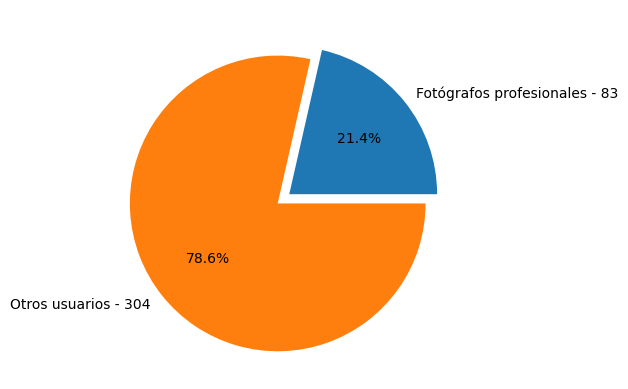

In [52]:
show_loan_distrib(df_comunes_aut['is_photographer'])

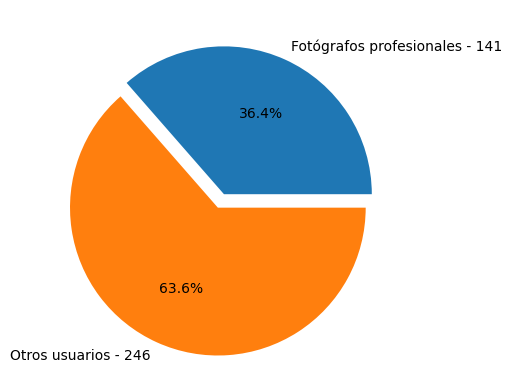

In [53]:
show_loan_distrib(df_comunes_manual['is_photographer'])

In [54]:
df_comunes_aut.to_csv('dataset_flickr_ig_aut.csv', index = False)
df_comunes_manual.to_csv('dataset_flickr_ig_manual.csv', index = False)